<a href="https://colab.research.google.com/github/fmanid/TugasBesar-BigData-2022/blob/main/TugasBesarBigdata_Firman_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing required libraries

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ec4ab3aacdd135f3ac667977e6d2f1a430cd26dd9c35e03f46a23d4809e64386
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget

In [ ]:
#Downloading the dataset 

In [ ]:
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

In [ ]:
DataSet

'2020T2Data.csv'

In [ ]:
#installing pyspark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 49 kB/s 
     |████████████████████████████████| 199 kB 65.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=a52245306036d756b5ef9145bbac555e7be0e4e2ce8af2c8ef5024d77e45be10
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:


#1.1 Data Exploration



In [ ]:
#importing required libraries
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf

In [ ]:
#Creating sparksession

In [ ]:
spark = (SparkSession
 .builder
 .appName('SIT742T2')
 .enableHiveSupport()
 .getOrCreate())

In [ ]:
#Reading csv file as a spark dataframe

In [ ]:
df = spark.read.csv('2020T2Data.csv',inferSchema = True,header=True)

In [ ]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- value(M): string (nullable = true)
 |-- wage(K): integer (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Preferred Foot: string (nullable = true)
 |-- International Reputation: integer (nullable = true)
 |-- Weak Foot: integer (nullable = true)
 |-- Skill Moves: integer (nullable = true)
 |-- Work Rate: string (nullable = true)
 |-- Body Type: string (nullable = true)
 |-- Real Face: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Jersey Number: integer (nullable = true)
 |-- Joined: string (nullable = true)
 |-- Loaned From: string (nullable = true)
 |-- Contract 

In [ ]:
df.columns

['ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'value(M)',
 'wage(K)',
 'Special',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Real Face',
 'Position',
 'Jersey Number',
 'Joined',
 'Loaned From',
 'Contract Valid Until',
 'Height',
 'Height(CM)',
 'Weight',
 'Weight(KG)',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Release Clause(M)']

In [ ]:
df.show(5)

+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+----------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|value(M)|wage(K)|Special|Preferred Foot|International Reputation|Weak Foot|Skill Moves|     Work Rate| Body 

In [ ]:
#Which are the (min, mean and max) for Age

In [ ]:
from pyspark.sql import functions as F

import pyspark.sql.functions as F


#Statistics on Age 
print("Minimum of Age :")
df.select(F.min('Age')).show()


print("Mean of Age :")
df.select(F.mean('Age')).show()

print("Maximum of Age :")
df.select(F.max('Age')).show()


Minimum of Age :
+--------+
|min(Age)|
+--------+
|      16|
+--------+

Mean of Age :
+------------------+
|          avg(Age)|
+------------------+
|25.122205745043114|
+------------------+

Maximum of Age :
+--------+
|max(Age)|
+--------+
|      45|
+--------+



In [ ]:
#minimum age is 16, mean of age is 25.122205.., maximum age is 45

In [ ]:
#Which are the (min, mean and max) for Overall

In [ ]:

#Statistics on Overall 

print("Minimum of Overall :")
df.select(F.min('Overall')).show()


print("Mean of Overall :")
df.select(F.mean('Overall')).show()

print("Maximum of Overall :")
df.select(F.max('Overall')).show()

Minimum of Overall :
+------------+
|min(Overall)|
+------------+
|          46|
+------------+

Mean of Overall :
+-----------------+
|     avg(Overall)|
+-----------------+
|66.23869940132916|
+-----------------+

Maximum of Overall :
+------------+
|max(Overall)|
+------------+
|          94|
+------------+



In [ ]:
#minimum overall is 46, mean of overall is 66.23869940.. and maximum overall is 94

In [ ]:
#Find the position having highest Avg Overall (sort Avg Overall by position)

In [ ]:
df.groupBy("Position").agg(F.mean('Overall')).orderBy("avg(Overall)", ascending=False).show(10)

+--------+-----------------+
|Position|     avg(Overall)|
+--------+-----------------+
|      LF|73.86666666666666|
|      RF|            73.25|
|     RAM|72.28571428571429|
|     LAM|71.85714285714286|
|      LS|70.06280193236715|
|     RDM|69.75403225806451|
|      RS|69.52216748768473|
|     RCB|69.28398791540785|
|     LCM|69.27088607594936|
|     LCB|69.24074074074075|
+--------+-----------------+
only showing top 10 rows



In [ ]:
#So position "LF" have highest avg(Overall)

In [ ]:
#Find the top 3 countries with highest Avg Overall (sort Avg Overall by countries)

In [ ]:
df.groupBy("Nationality").agg(F.mean('Overall')).orderBy("avg(Overall)", ascending=False).show(3)

+--------------------+-----------------+
|         Nationality|     avg(Overall)|
+--------------------+-----------------+
|United Arab Emirates|             77.0|
|Central African Rep.|73.33333333333333|
|              Israel|72.14285714285714|
+--------------------+-----------------+
only showing top 3 rows



In [ ]:
#So the top 3 countries with highest Avg overall are "United Arab Emirates","Central American Rep." and "Israel"

In [ ]:


#1.1.B



In [ ]:
#Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet

In [ ]:
#Your code for the results on Avg Potentials on Country by Position with ordering the results on country by alphabet (show top 10)

df1 = df.groupBy("Nationality","Position").agg(F.mean('Potential')).orderBy("Nationality",descending=False)
df1.show(10)

+-----------+--------+-----------------+
|Nationality|Position|   avg(Potential)|
+-----------+--------+-----------------+
|Afghanistan|     CAM|             66.0|
|Afghanistan|      CM|             71.0|
|Afghanistan|      LM|             70.0|
|Afghanistan|      LB|             64.0|
|    Albania|      LB|             66.0|
|    Albania|     RCB|             68.0|
|    Albania|     CDM|             69.5|
|    Albania|      CB|74.33333333333333|
|    Albania|      GK|             77.5|
|    Albania|      RM|             64.0|
+-----------+--------+-----------------+
only showing top 10 rows



In [ ]:
#Find position having highest Avg Potential for Australia

In [ ]:
#Your Code to identify the position having highest Avg Potential for Australia

df1.filter((df1.Nationality=="Australia")).orderBy("avg(Potential)",ascending=False).show(5)

+-----------+--------+-----------------+
|Nationality|Position|   avg(Potential)|
+-----------+--------+-----------------+
|  Australia|     RDM|             77.0|
|  Australia|     RCM|             72.5|
|  Australia|     CAM|            71.25|
|  Australia|     LWB|             71.0|
|  Australia|      RM|70.53846153846153|
+-----------+--------+-----------------+
only showing top 5 rows



In [ ]:
#So Position with Highest average potential for Australia is "RDM"

In [ ]:
#is there a age that the player is fully released his potential? If there is, could you find out?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
X = df.groupBy("Age").agg(F.mean('Potential'))

In [ ]:
X.show(100)

+---+-----------------+
|Age|   avg(Potential)|
+---+-----------------+
| 31|69.85007072135785|
| 34|69.53960396039604|
| 28| 69.4441416893733|
| 26|70.17664023071377|
| 27| 69.7091222030981|
| 22|72.81940298507463|
| 16|73.19047619047619|
| 40| 67.6923076923077|
| 20|73.21370967741936|
| 19|     73.146484375|
| 41|             67.6|
| 37| 68.9390243902439|
| 17|74.33910034602076|
| 35|68.13265306122449|
| 23|72.55555555555556|
| 39|            67.64|
| 45|             71.0|
| 38|67.37837837837837|
| 25|71.29037149355572|
| 24|72.07952871870398|
| 29|69.35766423357664|
| 21|72.95783555867885|
| 32|69.52961672473867|
| 33|69.55882352941177|
| 42|             65.0|
| 30|69.70010905125409|
| 18|73.53005464480874|
| 36|67.93700787401575|
| 44|             50.5|
+---+-----------------+



In [ ]:
age =[31,34,28,26,27,44,22,16,40,20,19,41,37,17,35,23,39,45,38,25,24,29,21,32,33,42,30,18,36]
avg_pot = [69.85007072135785, 69.53960396039604, 69.4441416893733, 70.17664023071377, 69.7091222030981, 50.5, 72.81940298507463, 73.19047619047619,
                 67.6923076923077, 73.21370967741936, 73.146484375, 67.6, 68.9390243902439, 74.33910034602076, 68.13265306122449, 72.55555555555556, 67.64,
                 71.0, 67.37837837837837, 71.29037149355572, 72.07952871870398, 69.35766423357664, 72.95783555867885, 69.52961672473867,
                 69.55882352941177, 65.0, 69.70010905125409, 73.53005464480874, 67.93700787401575]

In [ ]:
len(age), len(avg_pot)

(29, 29)

In [ ]:
d = {'Age': age,'avg(Potential)': avg_pot}
dss = pd.DataFrame(d)

In [ ]:
dss.sort_values(by=['Age'], inplace=True)
dss

,Age,avg(Potential)
7,16,73.190476
13,17,74.339100
27,18,73.530055
10,19,73.146484
9,20,73.213710
22,21,72.957836
6,22,72.819403
15,23,72.555556
20,24,72.079529
19,25,71.290371


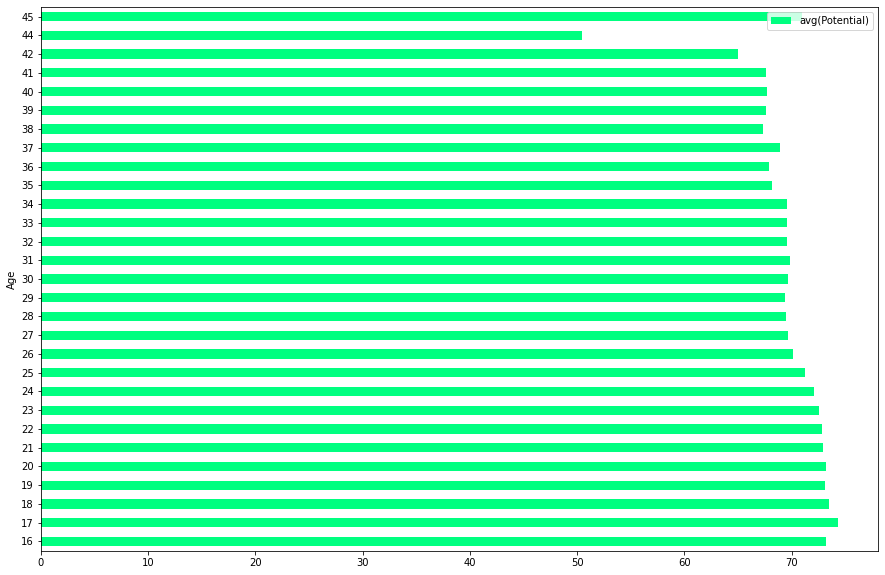

In [ ]:
dss.plot(kind='barh',x='Age',y='avg(Potential)',colormap='winter_r',figsize = (15,10))
plt.show()

In [ ]:
Y = df.groupBy("Age").agg(F.mean('Overall'))

In [ ]:
Y.show(30)

+---+------------------+
|Age|      avg(Overall)|
+---+------------------+
| 31| 69.85007072135785|
| 34| 69.53960396039604|
| 28| 69.21344232515895|
| 26| 68.51478010093727|
| 27| 68.94922547332186|
| 22| 64.99402985074627|
| 16| 54.45238095238095|
| 40|  67.6923076923077|
| 20|61.858870967741936|
| 19|     59.5830078125|
| 41|              67.6|
| 37|  68.9390243902439|
| 17| 56.40484429065744|
| 35| 68.13265306122449|
| 23| 66.24474474474475|
| 39|             67.64|
| 45|              71.0|
| 38| 67.37837837837837|
| 25| 67.97346474601972|
| 24| 67.30633284241532|
| 29|  69.2460896767466|
| 21| 63.48067463106114|
| 32| 69.52961672473867|
| 33| 69.55882352941177|
| 42|              65.0|
| 30| 69.69574700109051|
| 18| 57.74180327868852|
| 36| 67.93700787401575|
| 44|              50.5|
+---+------------------+



In [ ]:
avg_ovr = [69.85007072135785, 69.53960396039604, 69.21344232515895, 68.51478010093727, 68.94922547332186, 50.5, 64.99402985074627, 54.45238095238095,
          67.6923076923077, 61.858870967741936, 59.5830078125, 67.6, 68.9390243902439, 56.40484429065744, 68.13265306122449, 66.24474474474475, 67.64,
          71.0, 67.37837837837837, 67.97346474601972, 67.30633284241532, 69.2460896767466, 63.48067463106114, 69.52961672473867, 69.55882352941177,65.0,
          69.69574700109051, 57.74180327868852, 67.93700787401575]
len(avg_ovr)

29

In [ ]:
d = {'Age': age,'avg(Overall)': avg_ovr}
ds = pd.DataFrame(d)

In [ ]:
ds.sort_values(by=['Age'], inplace=True)
ds

,Age,avg(Overall)
7,16,54.452381
13,17,56.404844
27,18,57.741803
10,19,59.583008
9,20,61.858871
22,21,63.480675
6,22,64.994030
15,23,66.244745
20,24,67.306333
19,25,67.973465


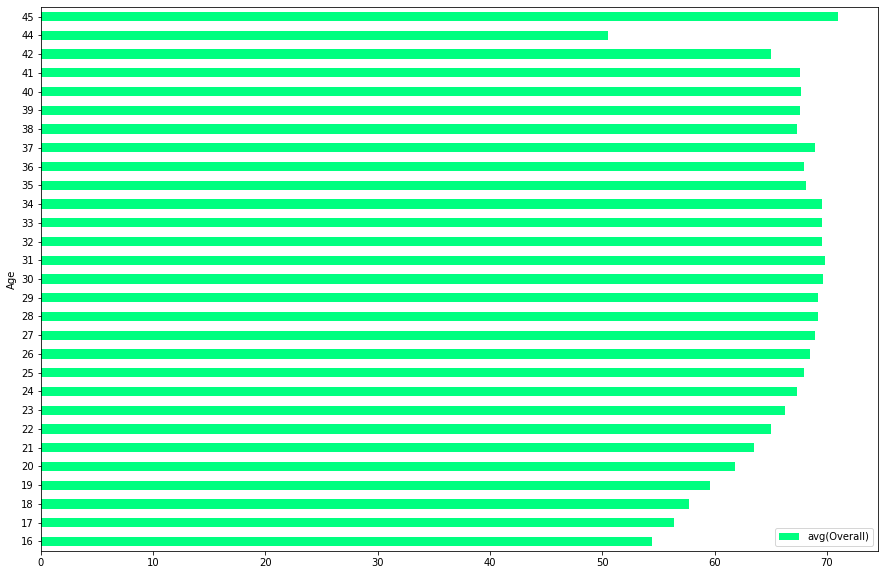

In [ ]:
ds.plot(kind='barh',x='Age',y='avg(Overall)',colormap='winter_r',figsize = (15,10))
plt.show()

In [ ]:
dff = pd.DataFrame(dss['avg(Potential)'] - ds['avg(Overall)'])
dff['Age'] = ds['Age']
dff

,0,Age
7,18.738095,16
13,17.934256,17
27,15.788251,18
10,13.563477,19
9,11.354839,20
22,9.477161,21
6,7.825373,22
15,6.310811,23
20,4.773196,24
19,3.316907,25


In [ ]:
# So at age of 31,32,33....42,44,45 players fully released their potential

In [ ]:



# Part 2 - Unsupervised Learning: Kmeans




In [ ]:


#DATA PREPARATION



In [ ]:
#code to select relevant features and filter the data by removing the GK

In [ ]:
df2 = df.select('ID','Position', 'Height(CM)', 'Weight(KG)', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 
           'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 
           'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle')
df2.show(3)
df2 = df2.filter((df.Position != "GK"))
df2.show(5)

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+------

In [ ]:
df2.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Position: string (nullable = true)
 |-- Height(CM): double (nullable = true)
 |-- Weight(KG): double (nullable = true)
 |-- Crossing: integer (nullable = true)
 |-- Finishing: integer (nullable = true)
 |-- HeadingAccuracy: integer (nullable = true)
 |-- ShortPassing: integer (nullable = true)
 |-- Volleys: integer (nullable = true)
 |-- Dribbling: integer (nullable = true)
 |-- Curve: integer (nullable = true)
 |-- FKAccuracy: integer (nullable = true)
 |-- LongPassing: integer (nullable = true)
 |-- BallControl: integer (nullable = true)
 |-- Acceleration: integer (nullable = true)
 |-- SprintSpeed: integer (nullable = true)
 |-- Agility: integer (nullable = true)
 |-- Reactions: integer (nullable = true)
 |-- Balance: integer (nullable = true)
 |-- ShotPower: integer (nullable = true)
 |-- Jumping: integer (nullable = true)
 |-- Stamina: integer (nullable = true)
 |-- Strength: integer (nullable = true)
 |-- LongShots: integer (nullable =

In [ ]:
from pyspark.sql.functions import when,col

# Your code to complete
DEF=  ['LB','LWB','RB','LCB','RCB','CB','RWB']
FWD=   ['RF','LF','LW','RS','RW','LS','CF','ST']
MID=  ['LCM','LM','RDM','CAM','RAM','RCM','CM','CDM','RM','LAM','LDM']


# code here to create a new variable df_kmeans_new with a new column Position_Group, ..


df_kmeans_new = df2.withColumn(
    'Position_Group',
    F.when((F.col("Position") == 'LB') | (F.col("Position") == 'LWB') | (F.col("Position") == 'RB') | (F.col("Position") == 'LCB') | (F.col("Position") == 'RCB') | (F.col("Position") == 'CB') | (F.col("Position") == 'RWB'), 'DEF')\
    .when((F.col("Position") == 'RF') | (F.col("Position") == 'LF') | (F.col("Position") == 'LW') | (F.col("Position") == 'RS') | (F.col("Position") == 'RW') | (F.col("Position") == 'LS') | (F.col("Position") == 'CF') | (F.col("Position") == 'ST'), 'FWD')\
    .otherwise('MID')
)
df_kmeans_new.show(3)

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+---

In [ ]:
df_kmeans_new.groupBy('Height(CM)').count().show(100)

+----------+-----+
|Height(CM)|count|
+----------+-----+
|   158.496|    5|
|   195.072|  457|
|   173.736|  903|
|   170.688|  316|
|   161.544|   18|
|   207.264|    3|
|   179.832| 2226|
|   185.928| 1588|
|   201.168|   42|
|   204.216|   12|
|    182.88| 2609|
|   155.448| 2447|
|   188.976| 1531|
|    198.12|  133|
|   176.784|  942|
|   164.592|   30|
|    167.64|  145|
|   192.024|  661|
|  155.7528| 2054|
+----------+-----+



In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_ = vecAssembler.transform(df_kmeans_new).select('ID','features')
df_kmeans_.show(3)

+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.736,72.12112...|
| 20801|[188.976,83.00733...|
|190871|[179.832,68.0388,...|
+------+--------------------+
only showing top 3 rows



In [ ]:
import pyspark.sql.functions as f
m = df_kmeans_.select(f.collect_list('ID')).first()[0]
n = df_kmeans_.select(f.collect_list('features')).first()[0]

In [ ]:
ss = df_kmeans_new.select(['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'])

In [ ]:
ss.show(3)

+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|   173.736| 72.

In [ ]:
#Elbow plot

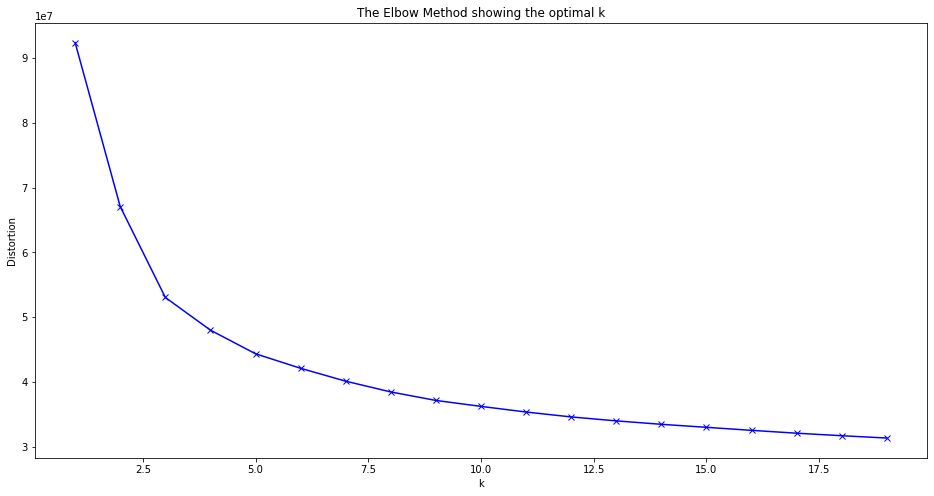

In [ ]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(n)
    distortions.append(kmeanModel.inertia_)
    

    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#Optimized value of k is 10

In [ ]:
#For K = 8

In [ ]:
l = df_kmeans_new.select(f.collect_list('Position_Group')).first()[0]
m = df_kmeans_new.select(f.collect_list('Height(CM)')).first()[0]

n = df_kmeans_new.select(f.collect_list('Weight(KG)')).first()[0]

In [ ]:
X = pd.DataFrame({'Group' : l, 'Height' : m, 'Weight' : n})

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X['Group'] = le.fit_transform(X.Group.values)
print(X)

       Group    Height     Weight
0          1  173.7360  72.121128
1          1  188.9760  83.007336
2          1  179.8320  68.038800
3          2  155.7528  69.853168
4          1  176.7840  73.935496
...      ...       ...        ...
16117      2  179.8320  60.781328
16118      1  192.0240  77.110640
16119      1  176.7840  67.131616
16120      1  155.4480  69.853168
16121      2  155.4480  79.832192

[16122 rows x 3 columns]


[5 2 5 ... 5 6 1]


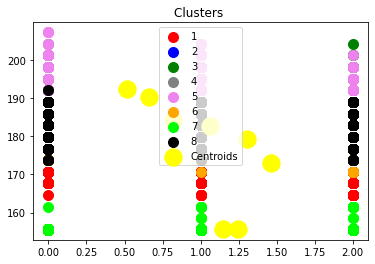

In [ ]:


from pyspark.ml.clustering import KMeans


from sklearn.cluster import KMeans
# Applying k-means to the dataset
kmeans = KMeans(n_clusters=8,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

X = X.values

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],s=100,c='gray',label='4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4,1],s=100,c='violet',label='5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5,1],s=100,c='orange',label='6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6,1],s=100,c='lime',label='7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7,1],s=100,c='black',label='8')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters ')
plt.legend()

plt.show()

In [ ]:



#Part 3 - Supervised Learning: Classification on Position_Group




In [ ]:


#3.1 Data Preparation



In [ ]:
FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']


vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
df_class_ = vecAssembler_.transform(df_kmeans_new).select('features','Position_Group')
df_class_.show(3)

+--------------------+--------------+
|            features|Position_Group|
+--------------------+--------------+
|[173.736,72.12112...|           FWD|
|[188.976,83.00733...|           FWD|
|[179.832,68.0388,...|           FWD|
+--------------------+--------------+
only showing top 3 rows



In [ ]:
from pyspark.ml.feature import StandardScaler

standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
raw_data=standardscaler.fit(df_class_).transform(df_class_)
raw_data.select("features","Scaled_features",'Position_Group').show(5)

+--------------------+--------------------+--------------+
|            features|     Scaled_features|Position_Group|
+--------------------+--------------------+--------------+
|[173.736,72.12112...|[12.9261363965246...|           FWD|
|[188.976,83.00733...|[14.0600080102548...|           FWD|
|[179.832,68.0388,...|[13.3796850420167...|           FWD|
|[155.7528,69.8531...|[11.5881678923229...|           MID|
|[176.784,73.93549...|[13.1529107192706...|           FWD|
+--------------------+--------------------+--------------+
only showing top 5 rows



In [ ]:
raw_data_ = raw_data.withColumn('Target',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))

In [ ]:
raw_data_.show()

+--------------------+--------------+--------------------+------+
|            features|Position_Group|     Scaled_features|Target|
+--------------------+--------------+--------------------+------+
|[173.736,72.12112...|           FWD|[12.9261363965246...|     0|
|[188.976,83.00733...|           FWD|[14.0600080102548...|     0|
|[179.832,68.0388,...|           FWD|[13.3796850420167...|     0|
|[155.7528,69.8531...|           MID|[11.5881678923229...|     2|
|[176.784,73.93549...|           FWD|[13.1529107192706...|     0|
|[176.784,66.22443...|           MID|[13.1529107192706...|     2|
|[182.88,86.18248,...|           FWD|[13.6064593647627...|     0|
|[182.88,82.100152...|           DEF|[13.6064593647627...|     1|
|[182.88,79.832192...|           FWD|[13.6064593647627...|     0|
|[182.88,76.203456...|           MID|[13.6064593647627...|     2|
|[188.976,78.01782...|           DEF|[14.0600080102548...|     1|
|[176.784,67.13161...|           MID|[13.1529107192706...|     2|
|[170.688,

In [ ]:



#3.2 Training Test Evaluation




In [ ]:
train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train)

predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Target","prediction").show(10)

+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     1|       1.0|
|     1|       1.0|
|     0|       0.0|
|     2|       2.0|
|     1|       1.0|
|     0|       2.0|
|     1|       2.0|
|     2|       2.0|
|     0|       0.0|
+------+----------+
only showing top 10 rows



In [ ]:
Target = predict_test.select(f.collect_list('Target')).first()[0]
prediction = predict_test.select(f.collect_list('prediction')).first()[0]

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Target, prediction)

array([[ 731,   12,  209],
       [   0, 1643,  142],
       [ 162,  144, 1714]])

In [ ]:
#recision    recall  f1-score

from sklearn.metrics import classification_report
print(classification_report(Target, prediction))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       952
           1       0.91      0.92      0.92      1785
           2       0.83      0.85      0.84      2020

    accuracy                           0.86      4757
   macro avg       0.85      0.85      0.85      4757
weighted avg       0.86      0.86      0.86      4757



In [ ]:


#3.3 K-fold Cross-Validation



In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
dataset = train.select('features','Target')
dataset = dataset.withColumnRenamed("Target", "label")

In [ ]:
lr = LinearRegression(maxIter=5, solver="l-bfgs") # solver="l-bfgs" here

modelEvaluator=RegressionEvaluator()
pipeline = Pipeline(stages=[lr])
paramGrid = ParamGridBuilder().addGrid(lr.regParam, [0.1, 0.01]).addGrid(lr.elasticNetParam, [0, 1]).build()


In [ ]:
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=modelEvaluator,
                          numFolds=3)



In [ ]:
n = raw_data_.select('Scaled_features','Target')

In [ ]:
n = n.withColumnRenamed("Target", "label")

In [ ]:
n = n.withColumnRenamed('Scaled_features','features')

In [ ]:
n

DataFrame[features: vector, label: int]

In [ ]:
cvModel = crossval.fit(n)
trainingSummary = cvModel.bestModel.summary

trainingSummary.totalIterations
# 2
trainingSummary.objectiveHistory # one value for each iteration

[0.4999689864780849,
 0.3600475243112104,
 0.31782363214359555,
 0.3047620545236012,
 0.29326791730328106,
 0.2867233032695258]

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Create an initial RandomForest model.
rf = RandomForestRegressor(labelCol="label", featuresCol="features")

# Evaluate model
rfevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")

# Create ParamGrid for Cross Validation
rfparamGrid = (ParamGridBuilder()
               .addGrid(rf.maxDepth, [2, 5, 10])
               .addGrid(rf.maxBins, [5, 10, 20])
               .addGrid(rf.numTrees, [5, 20, 50])
             .build())

# Create 5-fold CrossValidator
rfcv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rfparamGrid,
                      evaluator = rfevaluator,
                      numFolds = 5)


In [ ]:
# Run cross validations.
rfcvModel = rfcv.fit(n)
print(rfcvModel)

CrossValidatorModel_c9cc6bd2da70


In [ ]:
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator



# generate the train/test split.
(train, test) = n.randomSplit([0.8, 0.2])

# instantiate the base classifier.
lr = LogisticRegression(maxIter=10, tol=1E-6, fitIntercept=True)

# instantiate the One Vs Rest Classifier.
ovr = OneVsRest(classifier=lr)



In [ ]:
# train the multiclass model.
ovrModel = ovr.fit(train)


In [ ]:
# score the model on test data.
predictions = ovrModel.transform(test)


In [ ]:
# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")


In [ ]:
evaluator

MulticlassClassificationEvaluator_edbf06a26084

In [ ]:
# compute the classification error on test data.
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.14142


In [ ]:
##END